# EDA

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
data_dir = "../../accommodation-reviews/rectour24/"

train_users = pl.read_csv(data_dir + "train_users.csv")
train_reviews = pl.read_csv(data_dir + "train_reviews.csv")
train_matches = pl.read_csv(data_dir + "train_matches.csv")

valid_users = pl.read_csv(data_dir + "val_users.csv")
valid_reviews = pl.read_csv(data_dir + "val_reviews.csv")
valid_matches = pl.read_csv(data_dir + "val_matches.csv")

test_users = pl.read_csv(data_dir + "test_users.csv")
test_reviews = pl.read_csv(data_dir + "test_reviews.csv")

## Check data statistics

In [3]:
# print dataset sizes
len(train_users), len(train_reviews), len(train_matches), len(valid_users), len(valid_reviews), len(valid_matches), len(test_users), len(test_reviews)

(1628989, 1628989, 1628989, 203787, 203787, 203787, 199138, 199138)

In [4]:
# unique users, reviews, accommodations
print(len(train_users['user_id'].unique()), len(train_reviews['review_id'].unique()), len(train_users['accommodation_id'].unique()))
print(len(valid_users['user_id'].unique()), len(valid_reviews['review_id'].unique()), len(valid_users['accommodation_id'].unique()))
print(len(test_users['user_id'].unique()), len(test_reviews['review_id'].unique()), len(test_users['accommodation_id'].unique()))

1628989 1628989 40000
203787 203787 5000
199138 199138 5000


In [5]:
len(train_reviews['accommodation_id'].unique()), len(valid_reviews['accommodation_id'].unique()), len(test_reviews['accommodation_id'].unique())

(40000, 5000, 5000)

### users

In [6]:
train_users.head()

user_id,accommodation_id,guest_type,guest_country,room_nights,month,accommodation_type,accommodation_country,accommodation_score,accommodation_star_rating,location_is_ski,location_is_beach,location_is_city_center
str,i64,str,str,i64,i64,str,str,f64,f64,i64,i64,i64
"""8e2ee00e-08bf-4229-aefb-74224a…",-1109473678,"""Family with children""","""Vey""",2,2,"""Hotel""","""Turkey""",8.3,5.0,0,0,0
"""776accc3-9f1b-4a2e-8616-aafcac…",-1189343073,"""Solo traveller""","""Gobuf""",2,3,"""Hotel""","""Italy""",8.0,4.0,0,0,0
"""e32f90a1-1580-4a87-86a1-7602d5…",-1454980525,"""Couple""","""Qehoj""",3,6,"""Hotel""","""Germany""",8.5,4.0,0,0,1
"""9f246c70-def0-4b93-8c8a-296f50…",-773005129,"""Family with children""","""Mejok""",1,8,"""Apartment""","""United Kingdom""",9.3,0.0,0,0,0
"""2958080f-b80d-4bcb-84e9-2e053c…",462909752,"""Family with children""","""Zuc""",6,6,"""Hotel""","""Australia""",8.7,4.0,0,1,0


In [7]:
len(valid_users.columns), valid_users.columns

(13,
 ['user_id',
  'accommodation_id',
  'guest_type',
  'guest_country',
  'room_nights',
  'month',
  'accommodation_type',
  'accommodation_country',
  'accommodation_score',
  'accommodation_star_rating',
  'location_is_ski',
  'location_is_beach',
  'location_is_city_center'])

In [8]:
train_users.null_count()

user_id,accommodation_id,guest_type,guest_country,room_nights,month,accommodation_type,accommodation_country,accommodation_score,accommodation_star_rating,location_is_ski,location_is_beach,location_is_city_center
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,2198,0,0,0,0,0,0,0,0,0


In [9]:
valid_users.null_count()

user_id,accommodation_id,guest_type,guest_country,room_nights,month,accommodation_type,accommodation_country,accommodation_score,accommodation_star_rating,location_is_ski,location_is_beach,location_is_city_center
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,228,0,0,0,0,0,0,0,0,0


In [10]:
test_users.null_count()

user_id,accommodation_id,guest_type,guest_country,room_nights,month,accommodation_type,accommodation_country,accommodation_score,accommodation_star_rating,location_is_ski,location_is_beach,location_is_city_center
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,264,0,0,0,0,0,0,0,0,0


In [11]:
(
    len(set(valid_users['accommodation_id'].unique()) & set(train_users['accommodation_id'].unique())),
    len(set(test_users['accommodation_id'].unique()) & set(train_users['accommodation_id'].unique())),
    len(set(valid_users['accommodation_id'].unique()) & set(test_users['accommodation_id'].unique())),
)

(0, 0, 0)

There are no user_id and accommodation_id common to train, valid, test.

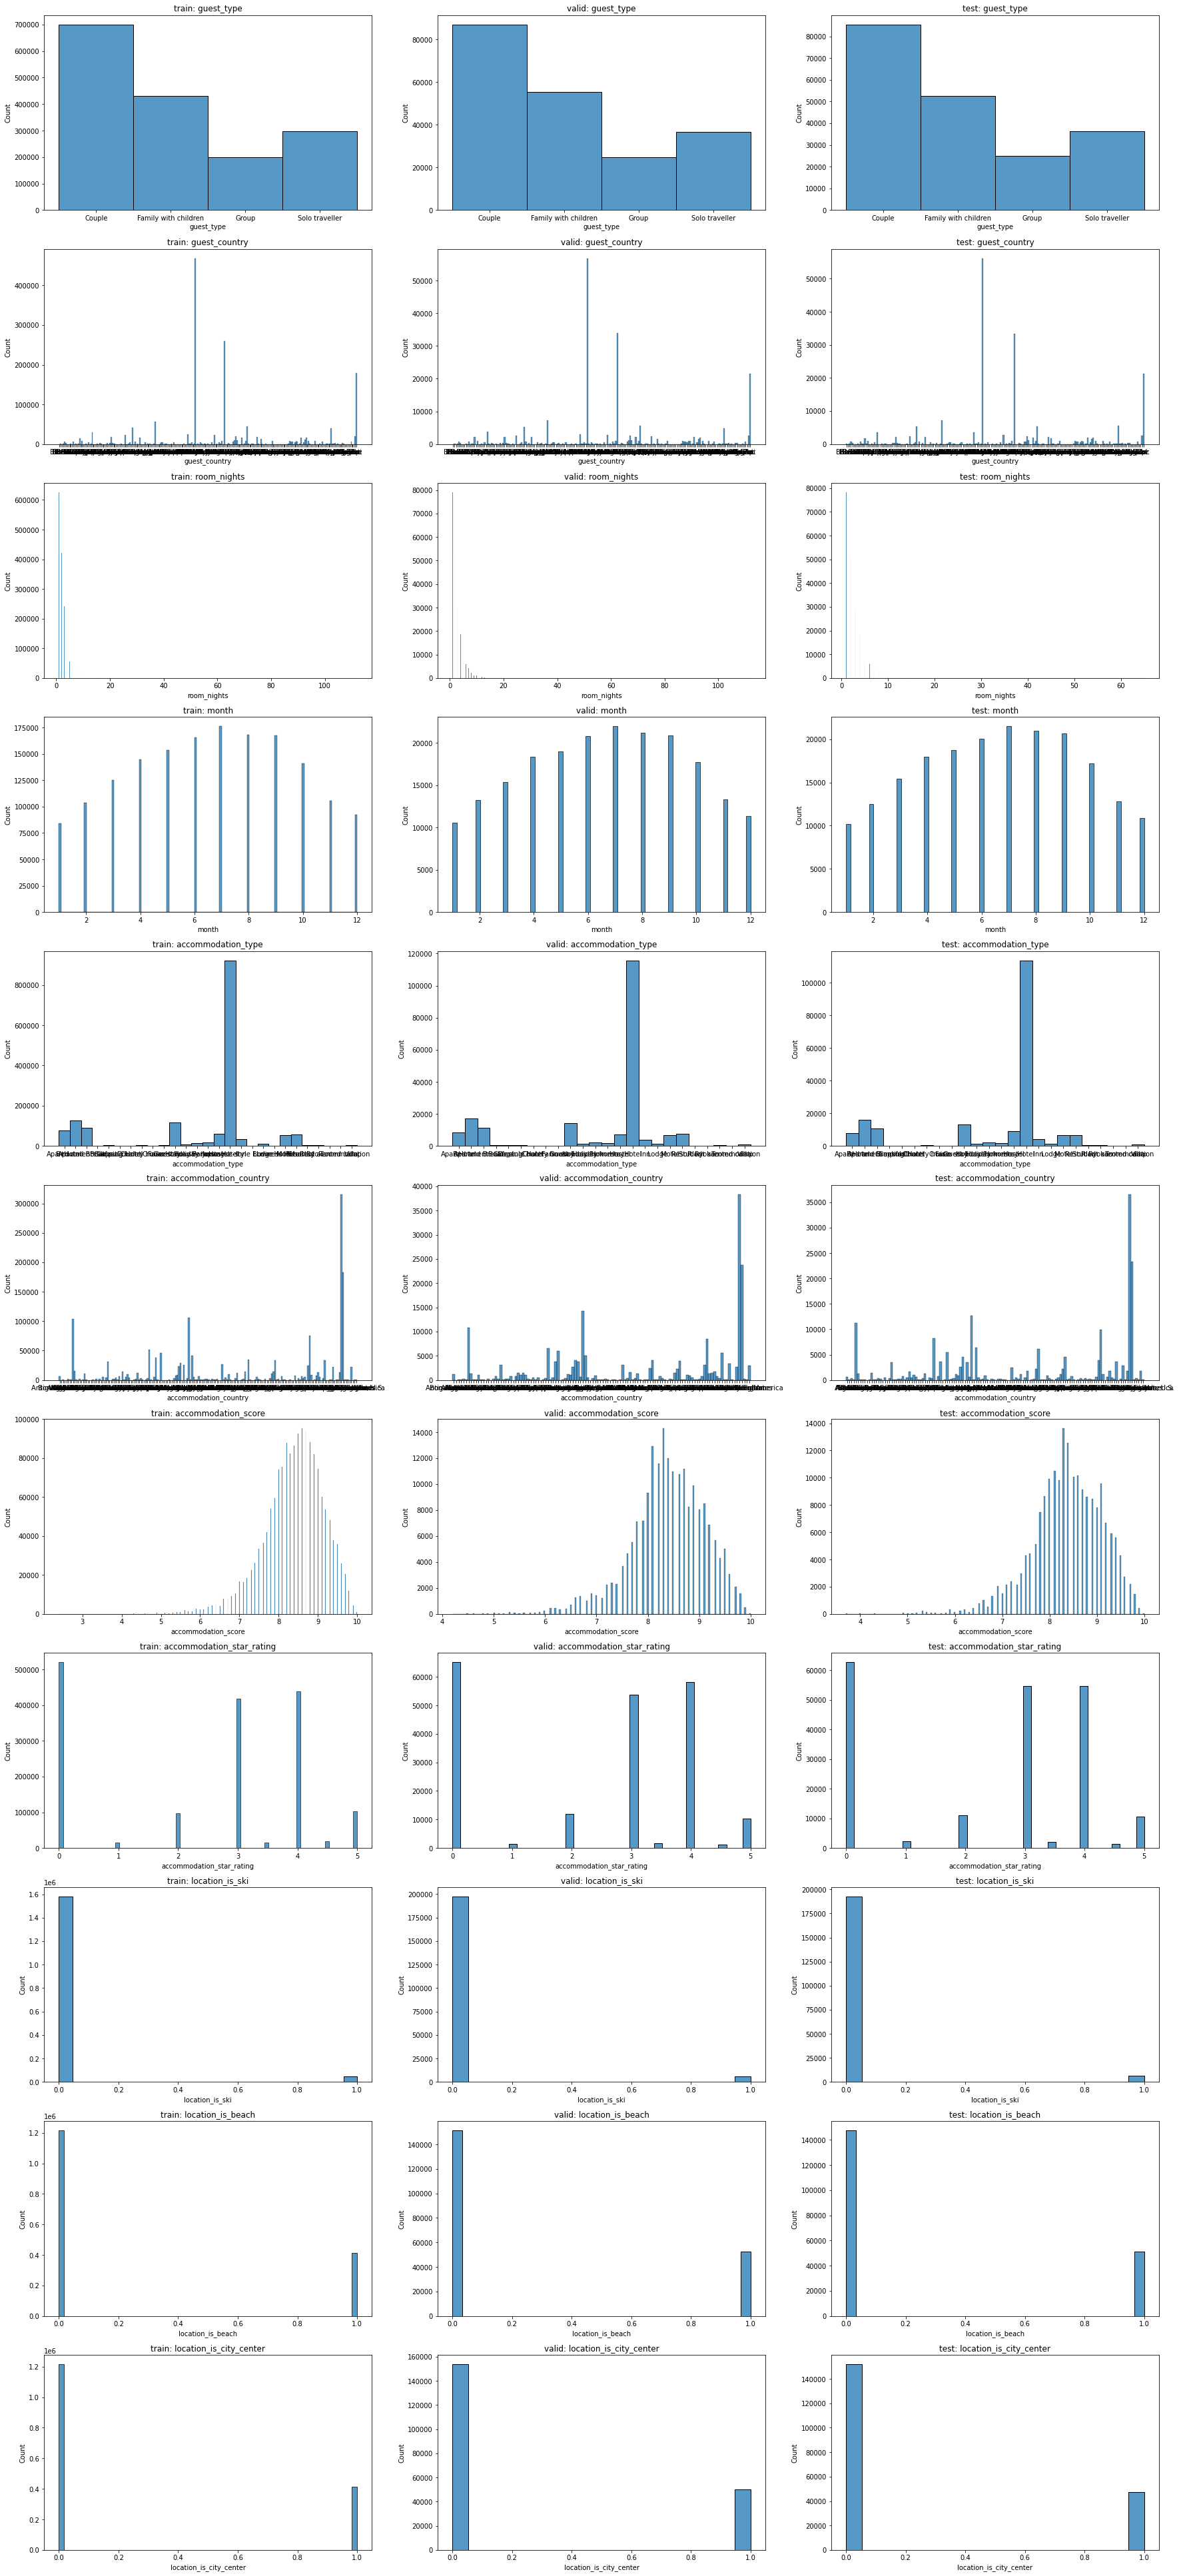

In [12]:
# check distribution of columns
fig, ax = plt.subplots(11, 3, figsize=(30, 70))

for i, col in enumerate(train_users.columns[2:]):
    sns.histplot(train_users[col].sort().to_pandas(), ax=ax[i, 0])
    sns.histplot(valid_users[col].sort().to_pandas(), ax=ax[i, 1])
    sns.histplot(test_users[col].sort().to_pandas(), ax=ax[i, 2])

    ax[i, 0].set_title(f"train: {col}")
    ax[i, 1].set_title(f"valid: {col}")
    ax[i, 2].set_title(f"test: {col}")

plt.show()

In [13]:
train_users['accommodation_id'].value_counts(sort=True) # More than 10 times is selected.

accommodation_id,count
i64,u32
-1335920432,1922
-269719989,1898
-921411410,1403
-1942357227,1333
-2445992,1288
…,…
-315831884,10
684751390,10
712704975,10


In [14]:
valid_users['accommodation_id'].value_counts(sort=True)

accommodation_id,count
i64,u32
937920089,1874
359671908,1681
1395491826,1435
-978565784,957
365136640,735
…,…
1037080510,10
731636901,10
-1348648169,10


In [15]:
test_users['accommodation_id'].value_counts(sort=True)

accommodation_id,count
i64,u32
1056140936,832
-821025872,774
-1912897402,755
-354047258,713
-558978085,655
…,…
-293795266,10
-1471690889,10
648489350,10


### reviews

In [16]:
train_reviews.head()

review_id,accommodation_id,review_title,review_positive,review_negative,review_score,review_helpful_votes
str,i64,str,str,str,f64,i64
"""bf762eec-0e44-42ff-a066-6be55a…",489020669,"""Nice &amp; friendly , Plenty o…","""Really nice staff. Good food.F…","""woken up 2.30 in the morning b…",10.0,0
"""3f1a116f-38ed-4fe8-9086-fd71b0…",1533822482,null,"""The staff was helpful and the …","""They only placed one wash clot…",9.0,0
"""2cfd21e7-4e2d-4a31-be9d-9e22c7…",222537300,null,"""&quot;Home Sweet Home&quot; is…",null,10.0,3
"""a240f502-0ee3-47e3-964b-786b56…",644485349,null,"""We havent stayed in a b&amp;b …",null,9.0,0
"""5086e380-21d4-4d5c-be6f-f2d04a…",-192152850,null,"""Location bed and pillows where…",null,10.0,0


In [17]:
train_reviews.null_count()

review_id,accommodation_id,review_title,review_positive,review_negative,review_score,review_helpful_votes
u32,u32,u32,u32,u32,u32,u32
0,0,531861,8,469549,0,0


In [18]:
valid_reviews.null_count()

review_id,accommodation_id,review_title,review_positive,review_negative,review_score,review_helpful_votes
u32,u32,u32,u32,u32,u32,u32
0,0,66799,2,58924,0,0


In [19]:
test_reviews.null_count()

review_id,accommodation_id,review_title,review_positive,review_negative,review_score,review_helpful_votes
u32,u32,u32,u32,u32,u32,u32
0,0,65146,0,57389,0,0


In [20]:
train_reviews.filter(pl.col('review_positive').is_null())

review_id,accommodation_id,review_title,review_positive,review_negative,review_score,review_helpful_votes
str,i64,str,str,str,f64,i64
"""f21cf20d-35e1-443a-a066-ce2d9d…",-42353067,null,null,null,10.0,0
"""9eeea2e7-d237-4d60-8035-529288…",-330013445,null,null,null,10.0,0
"""ddee6493-1ea6-4303-ada4-2deb99…",-1264240616,null,null,null,8.0,0
"""8c4eaf1e-0f76-4358-b268-4665c1…",1789835135,null,null,null,10.0,0
"""7585677d-262f-4cff-8c46-8e0030…",-1623750104,null,null,null,7.0,0
"""ba2e346d-4e8d-44e0-9c89-2248f1…",1325312269,"""I had a good rest here""",null,null,9.0,0
"""bd6c0981-7524-4bb4-9450-331a29…",1748773738,null,null,null,7.0,0
"""6b9dd0dc-d9ff-4f2e-bce9-a09688…",-1065939488,null,null,null,7.0,0


In [21]:
valid_reviews.filter(pl.col('review_positive').is_null())

review_id,accommodation_id,review_title,review_positive,review_negative,review_score,review_helpful_votes
str,i64,str,str,str,f64,i64
"""42e27519-59ab-479e-9e16-3de567…",880094040,"""Wonderful experience in Anurad…",null,null,10.0,0
"""8d85aeea-73ed-4d76-b094-b5083a…",1488976478,null,null,null,8.0,0


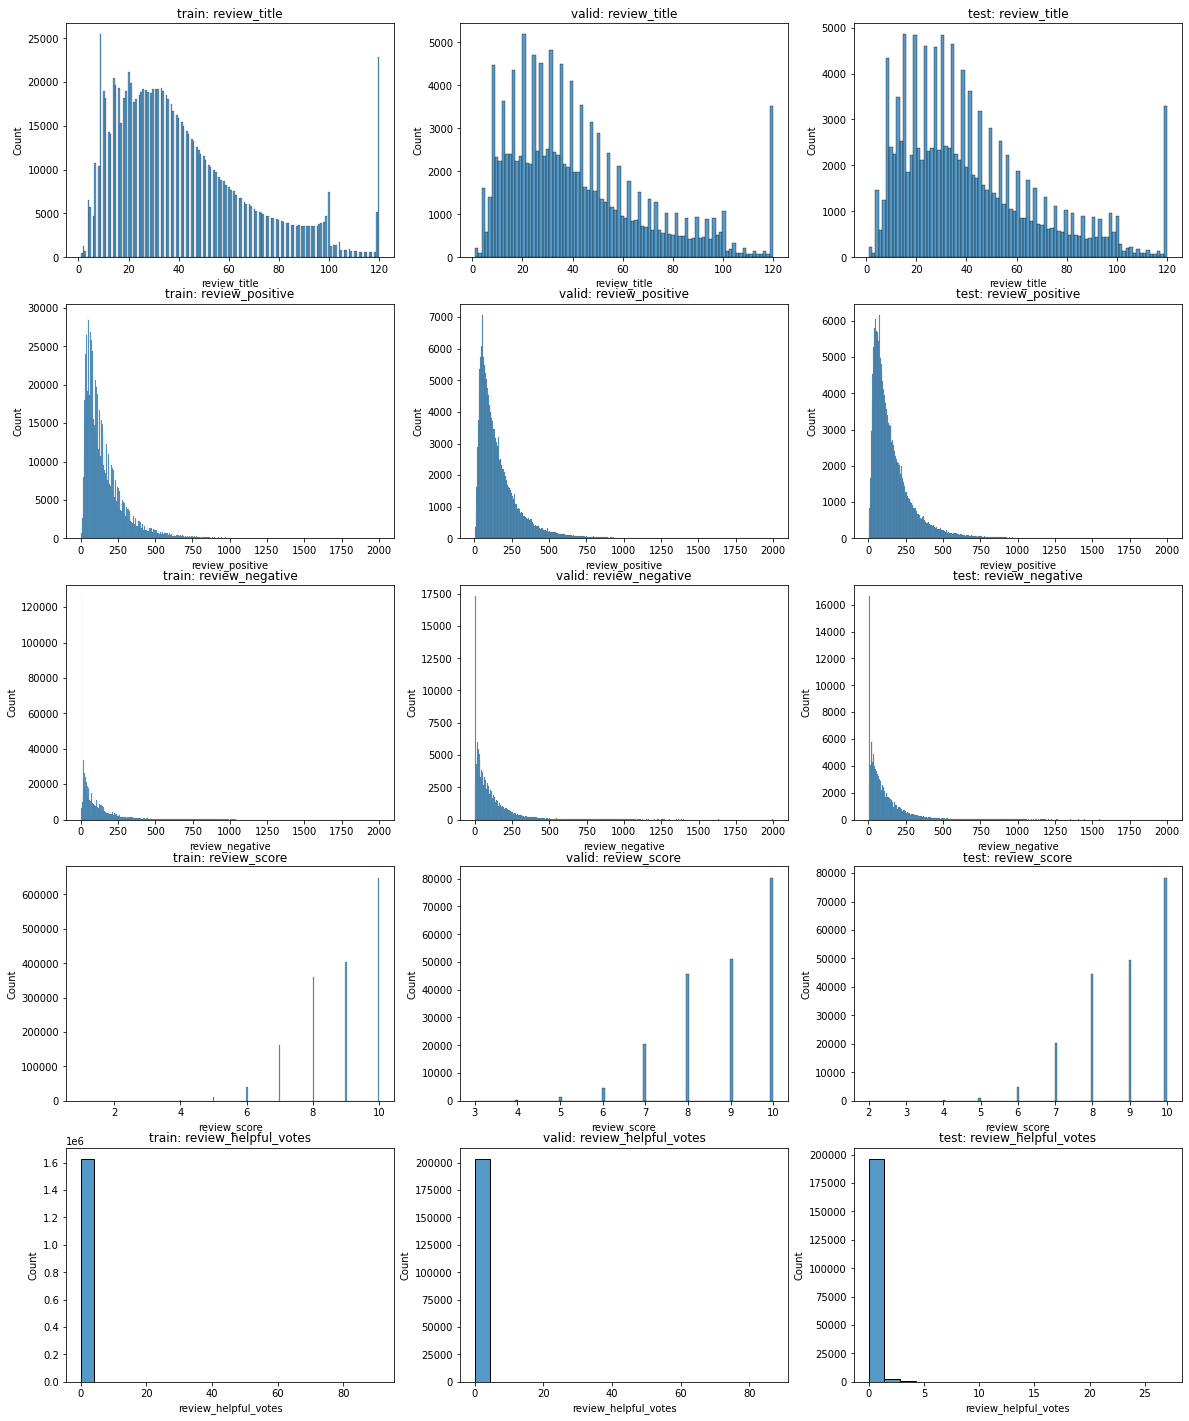

In [22]:
# featureの分布を確認
fig, ax = plt.subplots(5, 3, figsize=(20, 25))

for i, col in enumerate(train_reviews.columns[2:]):
    if i < 3:
        sns.histplot(train_reviews[col].str.len_chars().sort().to_pandas(), ax=ax[i, 0])
        sns.histplot(valid_reviews[col].str.len_chars().sort().to_pandas(), ax=ax[i, 1])
        sns.histplot(test_reviews[col].str.len_chars().sort().to_pandas(), ax=ax[i, 2])
    else:
        sns.histplot(train_reviews[col].sort().to_pandas(), ax=ax[i, 0])
        sns.histplot(valid_reviews[col].sort().to_pandas(), ax=ax[i, 1])
        sns.histplot(test_reviews[col].sort().to_pandas(), ax=ax[i, 2])

    ax[i, 0].set_title(f"train: {col}")
    ax[i, 1].set_title(f"valid: {col}")
    ax[i, 2].set_title(f"test: {col}")

plt.show()

Maximum length of `review_title` is 120 characters

### matches

In [23]:
train_matches.head()

accommodation_id,review_id,user_id
i64,str,str
842298552,"""9b7015a7-73a2-4ce0-94ff-309f27…","""495ef092-0399-4fcf-a6d1-7b4f52…"
1596437394,"""826320b2-f123-42f7-b5b9-6df668…","""312f1bc9-fdd9-4f3c-ac9e-582191…"
-1257837707,"""34b17750-7827-45f7-a797-42b92f…","""80f94a05-de92-49fb-b259-dd1c34…"
760669881,"""51153c31-19d4-4d93-807d-c0a55f…","""3821d21d-d973-4b36-bc03-1b986c…"
-1914121319,"""9741bdd6-91cf-4ed5-9f6b-761222…","""5e43d83e-8e68-4b33-a43b-794db3…"
